In [456]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [457]:
boston = datasets.load_boston()
print(boston)

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

In [458]:
data = pd.DataFrame(boston.data, columns = boston.feature_names)
data['target'] = boston.target
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# EDA

Text(0.5, 1.0, 'boston boxenplot')

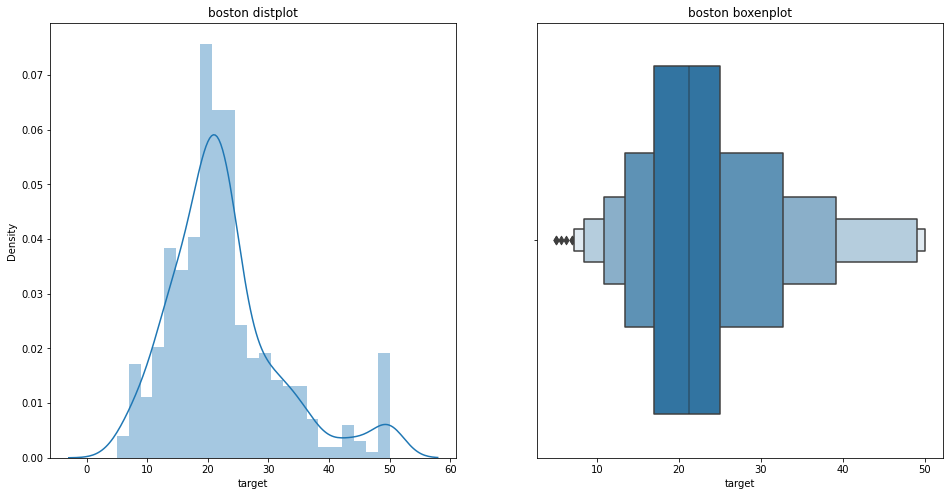

In [459]:
# 종속변수 확인해 보기
# 정규분포를 비슷하게 따르는 것으로 보인다.
fig, ax = plt.subplots(ncols = 2, figsize = (16,8))
sns.distplot(data['target'], ax = ax[0])
sns.boxenplot(data['target'], ax = ax[1])
ax[0].set_title('boston distplot')
ax[1].set_title('boston boxenplot')

Text(0.5, 1.0, 'boston boxenplot')

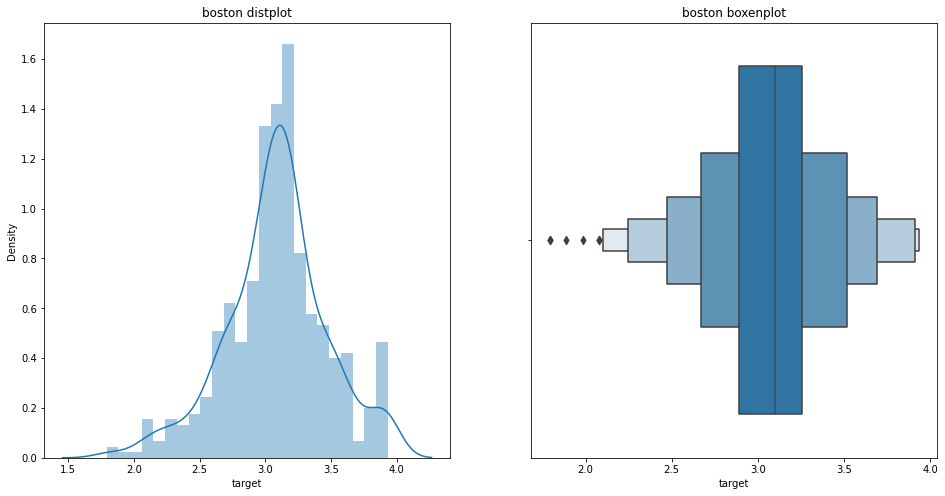

In [460]:
# target변수에 log화를 씌워서 분포를 비교해 본다.
data['target'] = data['target'].apply(lambda x:np.log1p(x))

# 다시 분포를 통해 확인해 본다.
fig, ax = plt.subplots(ncols = 2, figsize = (16,8))
sns.distplot(data['target'], ax = ax[0])
sns.boxenplot(data['target'], ax = ax[1])
ax[0].set_title('boston distplot')
ax[1].set_title('boston boxenplot')

# 아까보다 정규분포를 더 많이 따르는 것으로 확인했고 로그를 씌운 target을 사용하도록 하자.

In [461]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  target   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


Text(0.5, 1.0, 'CRIM vs Target scatterplot')

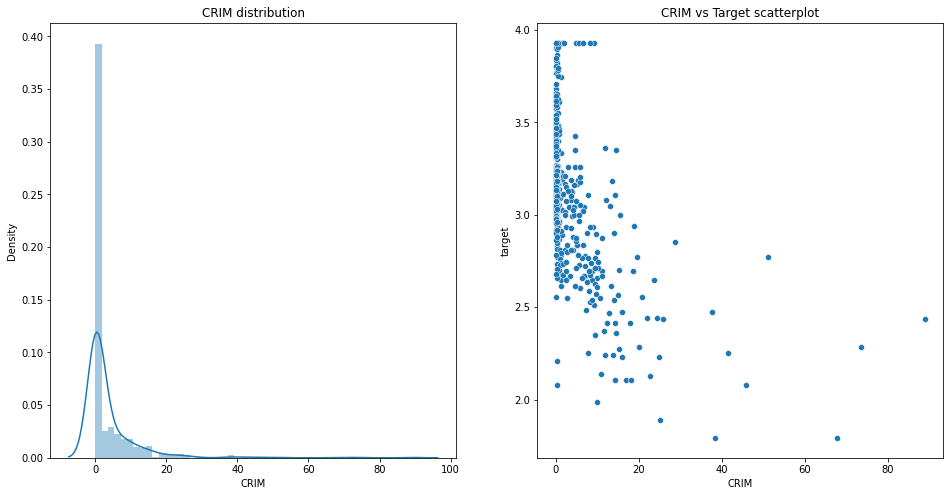

In [462]:
# CRIM
fig, ax = plt.subplots(ncols = 2, figsize = (16,8))
sns.distplot(data['CRIM'], ax = ax[0])
sns.scatterplot(data = data, x = 'CRIM', y = 'target', ax = ax[1])
ax[0].set_title('CRIM distribution')
ax[1].set_title('CRIM vs Target scatterplot')

In [463]:
# CRIM은 0에 몰려있기 때문에 정규화를 통해서 분석을 진행해 보자.
data['CRIM'] = data['CRIM'].apply(lambda x:np.log1p(x))

Text(0.5, 1.0, 'CRIM vs Target scatterplot')

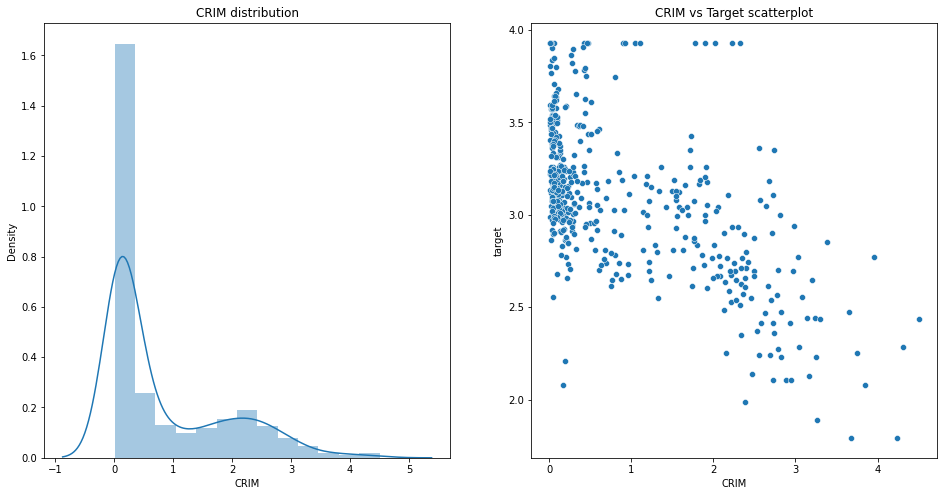

In [464]:
# CRIM
fig, ax = plt.subplots(ncols = 2, figsize = (16,8))
sns.distplot(data['CRIM'], ax = ax[0])
sns.scatterplot(data = data, x = 'CRIM', y = 'target', ax = ax[1])
ax[0].set_title('CRIM distribution')
ax[1].set_title('CRIM vs Target scatterplot')

Text(0.5, 1.0, 'ZN vs Target scatterplot')

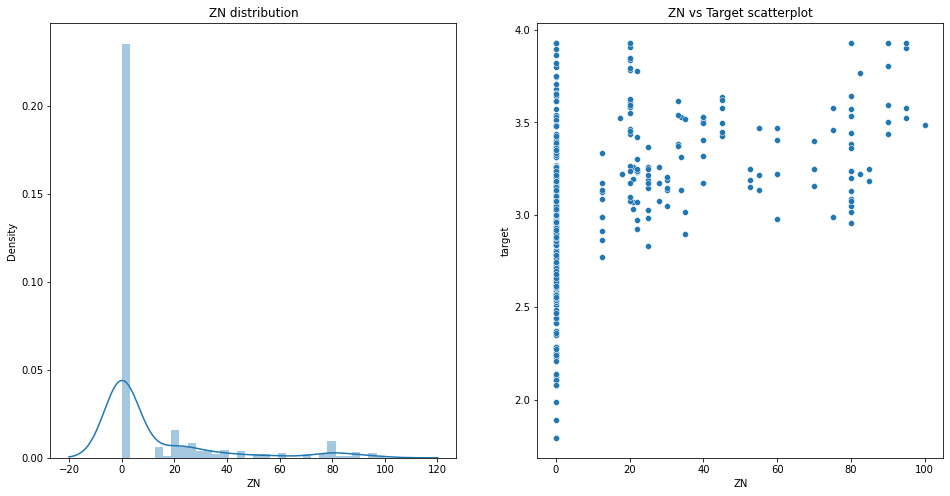

In [465]:
# ZN
fig, ax = plt.subplots(ncols = 2, figsize = (16,8))
sns.distplot(data['ZN'], ax = ax[0])
sns.scatterplot(data = data, x = 'ZN', y = 'target', ax = ax[1])
ax[0].set_title('ZN distribution')
ax[1].set_title('ZN vs Target scatterplot')

Text(0.5, 1.0, 'ZN vs Target scatterplot')

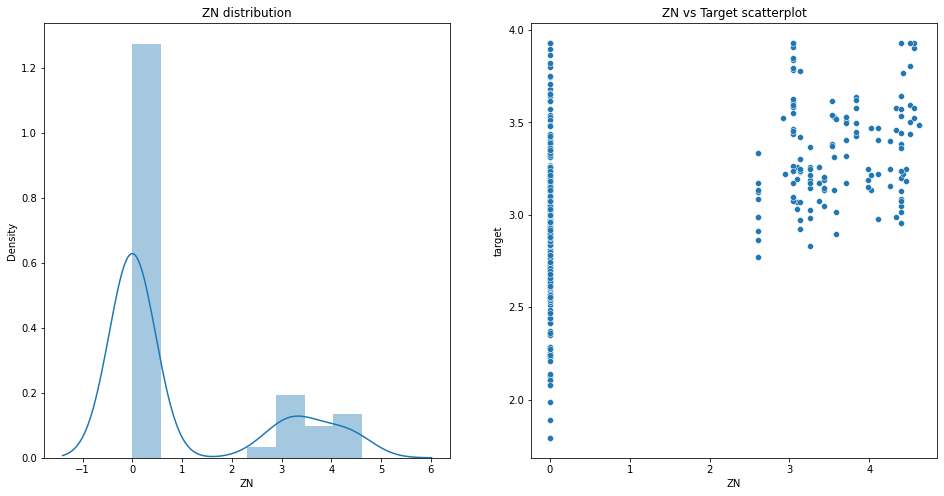

In [466]:
# ZN또한 log를 씌워준다.
data['ZN'] = data['ZN'].apply(lambda x: np.log1p(x))

# ZN
fig, ax = plt.subplots(ncols = 2, figsize = (16,8))
sns.distplot(data['ZN'], ax = ax[0])
sns.scatterplot(data = data, x = 'ZN', y = 'target', ax = ax[1])
ax[0].set_title('ZN distribution')
ax[1].set_title('ZN vs Target scatterplot')

Text(0.5, 1.0, 'CHAS vs Target barplot')

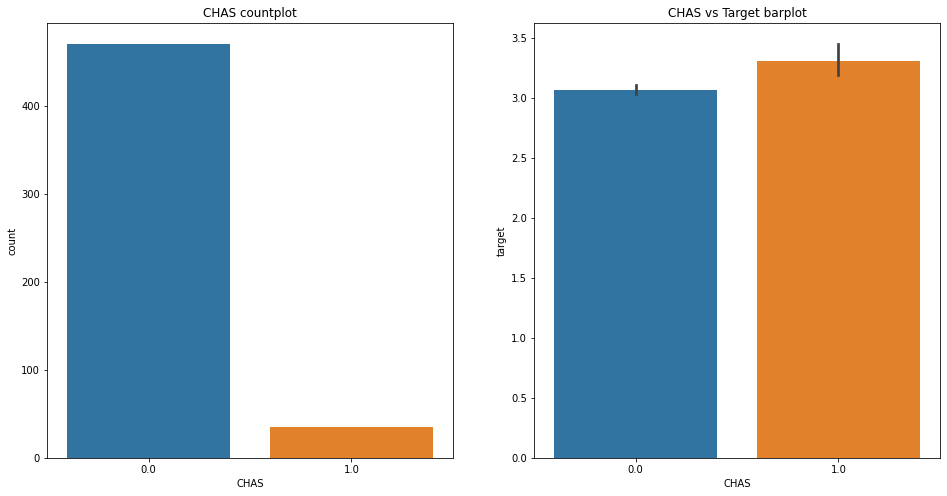

In [467]:
# CHAS # 더미화 시켜줄 것
fig, ax = plt.subplots(ncols = 2, figsize = (16,8))
sns.countplot(data['CHAS'], ax = ax[0])
sns.barplot(data = data, x = 'CHAS', y = 'target', ax = ax[1])
ax[0].set_title('CHAS countplot')
ax[1].set_title('CHAS vs Target barplot')

In [468]:
data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'target'],
      dtype='object')

Text(0.5, 1.0, 'NOX vs Target scatterplot')

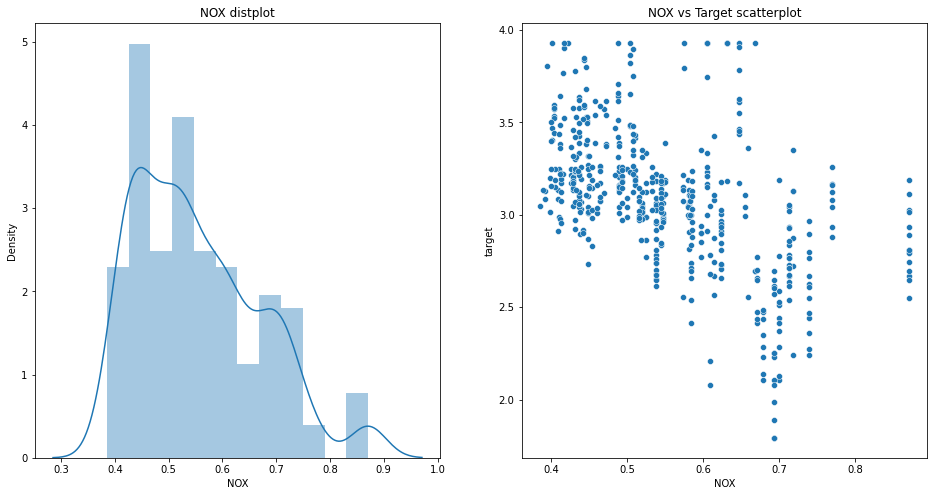

In [469]:
# NOX
fig, ax = plt.subplots(ncols = 2, figsize = (16,8))
sns.distplot(data['NOX'], ax = ax[0])
sns.scatterplot(data = data, x = 'NOX', y = 'target', ax = ax[1])
ax[0].set_title('NOX distplot')
ax[1].set_title('NOX vs Target scatterplot')

Text(0.5, 1.0, 'RM vs Target scatterplot')

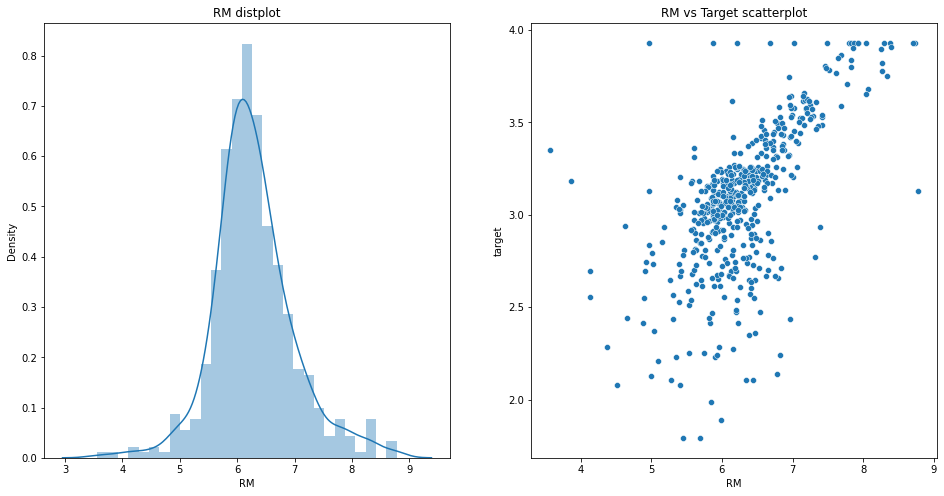

In [470]:
# RM
fig, ax = plt.subplots(ncols = 2, figsize = (16,8))
sns.distplot(data['RM'], ax = ax[0])
sns.scatterplot(data = data, x = 'RM', y = 'target', ax = ax[1])
ax[0].set_title('RM distplot')
ax[1].set_title('RM vs Target scatterplot')

Text(0.5, 1.0, 'AGE vs Target scatterplot')

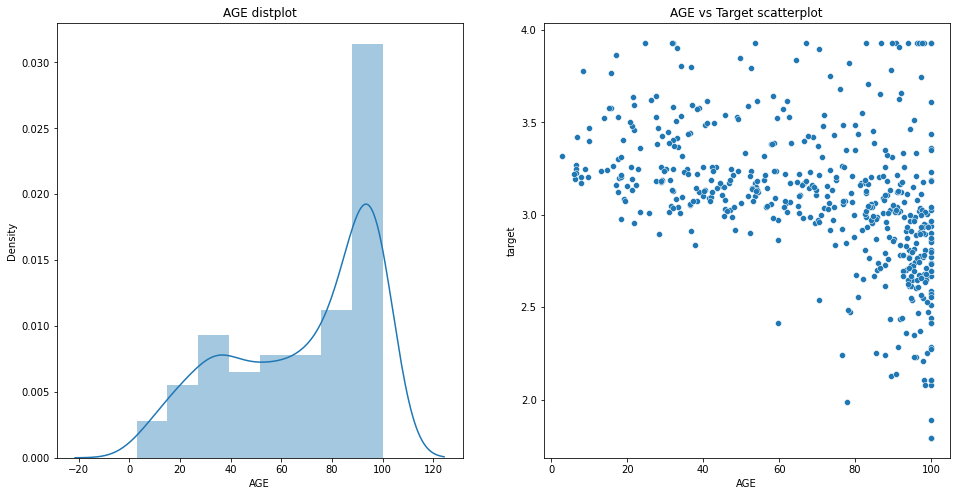

In [471]:
# AGE
fig, ax = plt.subplots(ncols = 2, figsize = (16,8))
sns.distplot(data['AGE'], ax = ax[0])
sns.scatterplot(data = data, x = 'AGE', y = 'target', ax = ax[1])
ax[0].set_title('AGE distplot')
ax[1].set_title('AGE vs Target scatterplot')

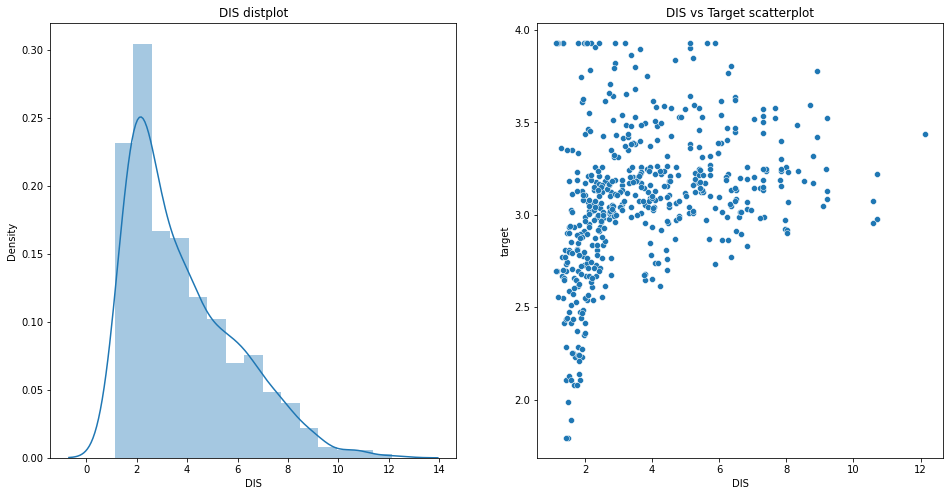

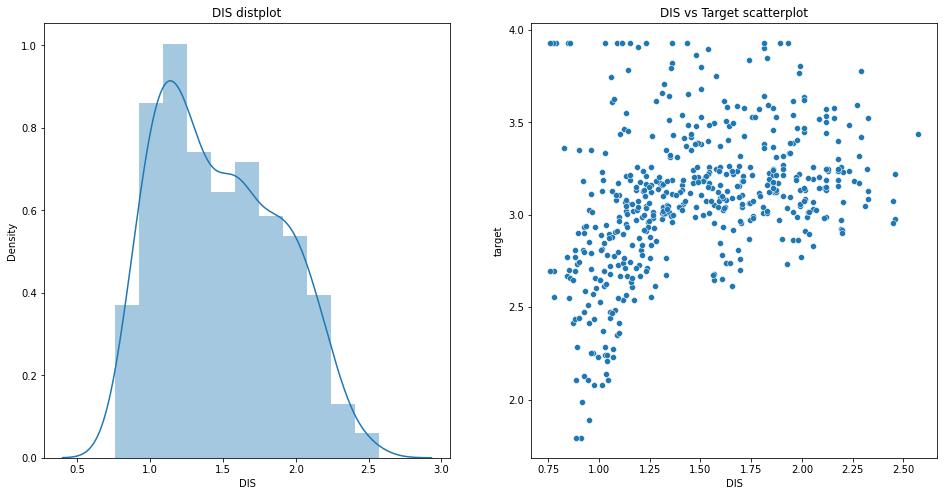

In [472]:
# DIS
fig, ax = plt.subplots(ncols = 2, figsize = (16,8))
sns.distplot(data['DIS'], ax = ax[0])
sns.scatterplot(data = data, x = 'DIS', y = 'target', ax = ax[1])
ax[0].set_title('DIS distplot')
ax[1].set_title('DIS vs Target scatterplot')
plt.show()
# log 씌워주기
data['DIS'] = data['DIS'].apply(lambda x: np.log1p(x))

# 다시 그래프 그려주기
fig, ax = plt.subplots(ncols = 2, figsize = (16,8))
sns.distplot(data['DIS'], ax = ax[0])
sns.scatterplot(data = data, x = 'DIS', y = 'target', ax = ax[1])
ax[0].set_title('DIS distplot')
ax[1].set_title('DIS vs Target scatterplot')
plt.show()

In [473]:
data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'target'],
      dtype='object')

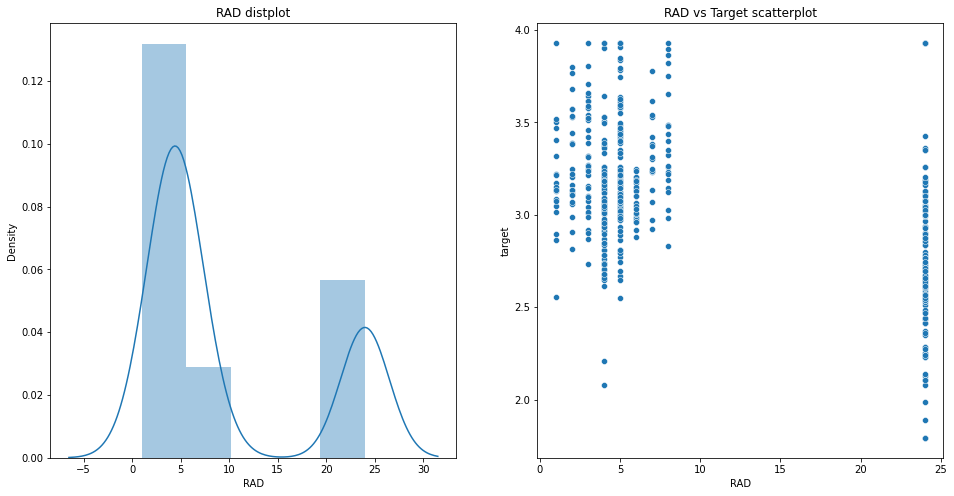

In [474]:
# RAD
fig, ax = plt.subplots(ncols = 2, figsize = (16,8))
sns.distplot(data['RAD'], ax = ax[0])
sns.scatterplot(data = data, x = 'RAD', y = 'target', ax = ax[1])
ax[0].set_title('RAD distplot')
ax[1].set_title('RAD vs Target scatterplot')
plt.show()

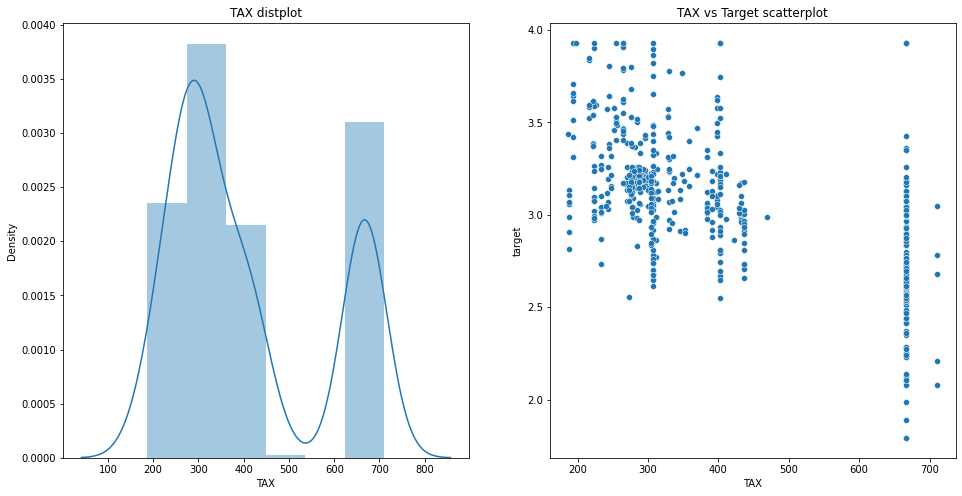

In [475]:
# TAX
fig, ax = plt.subplots(ncols = 2, figsize = (16,8))
sns.distplot(data['TAX'], ax = ax[0])
sns.scatterplot(data = data, x = 'TAX', y = 'target', ax = ax[1])
ax[0].set_title('TAX distplot')
ax[1].set_title('TAX vs Target scatterplot')
plt.show()

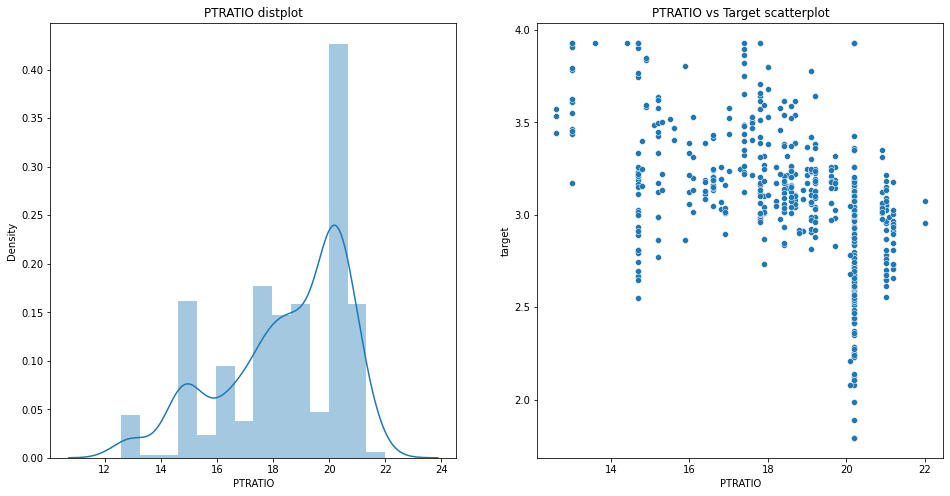

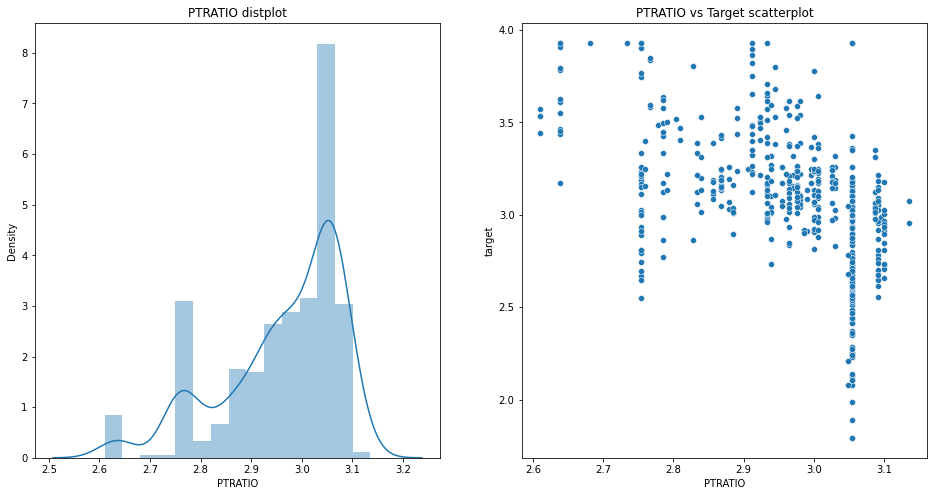

In [476]:
# PTRATIO
fig, ax = plt.subplots(ncols = 2, figsize = (16,8))
sns.distplot(data['PTRATIO'], ax = ax[0])
sns.scatterplot(data = data, x = 'PTRATIO', y = 'target', ax = ax[1])
ax[0].set_title('PTRATIO distplot')
ax[1].set_title('PTRATIO vs Target scatterplot')
plt.show()

# 로그를 씌워주고 분석을 진행한다.
data['PTRATIO'] = data['PTRATIO'].apply(lambda x: np.log1p(x))

# 그래프를 그려준다.
fig, ax = plt.subplots(ncols = 2, figsize = (16,8))
sns.distplot(data['PTRATIO'], ax = ax[0])
sns.scatterplot(data = data, x = 'PTRATIO', y = 'target', ax = ax[1])
ax[0].set_title('PTRATIO distplot')
ax[1].set_title('PTRATIO vs Target scatterplot')
plt.show()

In [477]:
data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'target'],
      dtype='object')

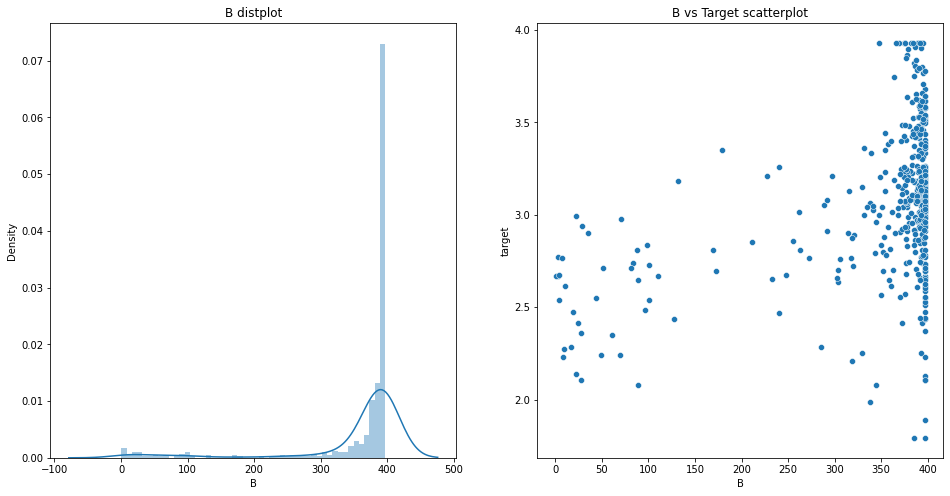

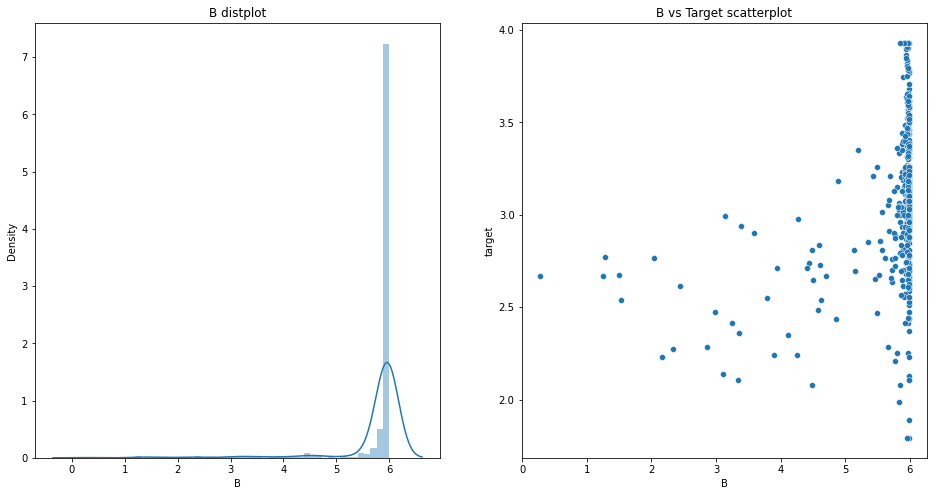

In [478]:
# B
fig, ax = plt.subplots(ncols = 2, figsize = (16,8))
sns.distplot(data['B'], ax = ax[0])
sns.scatterplot(data = data, x = 'B', y = 'target', ax = ax[1])
ax[0].set_title('B distplot')
ax[1].set_title('B vs Target scatterplot')
plt.show()

# log를 씌워준다.
data['B'] = data['B'].apply(lambda x: np.log1p(x))

# 다시 그래프를 그려준다.
fig, ax = plt.subplots(ncols = 2, figsize = (16,8))
sns.distplot(data['B'], ax = ax[0])
sns.scatterplot(data = data, x = 'B', y = 'target', ax = ax[1])
ax[0].set_title('B distplot')
ax[1].set_title('B vs Target scatterplot')
plt.show()

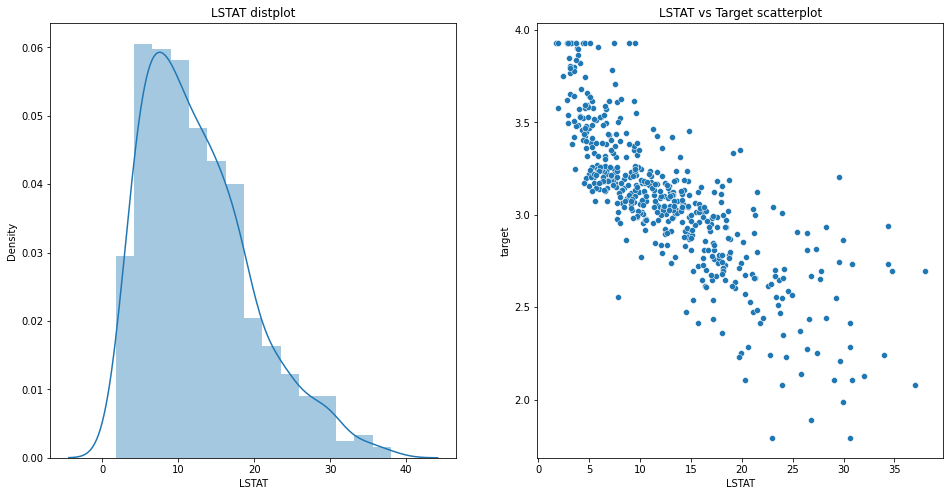

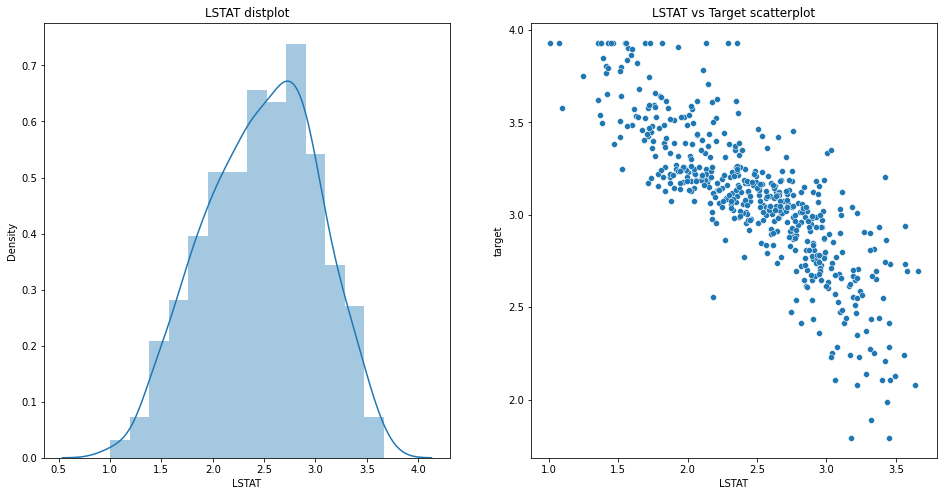

In [479]:
# LSTAT
fig, ax = plt.subplots(ncols = 2, figsize = (16,8))
sns.distplot(data['LSTAT'], ax = ax[0])
sns.scatterplot(data = data, x = 'LSTAT', y = 'target', ax = ax[1])
ax[0].set_title('LSTAT distplot')
ax[1].set_title('LSTAT vs Target scatterplot')
plt.show()

# log를 씌워준다.
data['LSTAT'] = data['LSTAT'].apply(lambda x:np.log1p(x))

# 그래프를 그려준다.
fig, ax = plt.subplots(ncols = 2, figsize = (16,8))
sns.distplot(data['LSTAT'], ax = ax[0])
sns.scatterplot(data = data, x = 'LSTAT', y = 'target', ax = ax[1])
ax[0].set_title('LSTAT distplot')
ax[1].set_title('LSTAT vs Target scatterplot')
plt.show()

# statsmodel

In [480]:
import statsmodels.api as sm
X = data.drop('target', axis = 1)
y = data['target']

model = sm.OLS(y,X)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                 target   R-squared (uncentered):                   0.995
Model:                            OLS   Adj. R-squared (uncentered):              0.995
Method:                 Least Squares   F-statistic:                              7564.
Date:                Wed, 07 Jul 2021   Prob (F-statistic):                        0.00
Time:                        07:46:35   Log-Likelihood:                          49.025
No. Observations:                 506   AIC:                                     -72.05
Df Residuals:                     493   BIC:                                     -17.11
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

# Modeling

In [547]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
X_train, X_test, y_train, y_test = train_test_split(data.drop('target', axis = 1), data['target'], test_size = 0.2, random_state = 42)

models = {'lr':LinearRegression(), 'ridge':Ridge(), 'lasso':Lasso(),'Elastic':ElasticNet()}
model_rmse = {}
for j,i in models.items():
  model = i
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  y_pred = np.exp(y_pred) - 1
  final_y = y_test.copy()
  final_y = np.exp(final_y)-1

  RMSE = mean_squared_error(final_y, y_pred)**0.5
  model_rmse[f'{j}'] = RMSE

print(model_rmse)

{'lr': 4.068527248638521, 'ridge': 4.112920179487871, 'lasso': 7.15533716498366, 'Elastic': 7.077487752024072}


# Kaggle Titanic

In [787]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
train = pd.read_csv('/content/drive/MyDrive/kaggle/titanic/train.csv')
test = pd.read_csv('/content/drive/MyDrive/kaggle/titanic/test.csv')

print(train.shape, test.shape)

(891, 12) (418, 11)


0    549
1    342
Name: Survived, dtype: int64


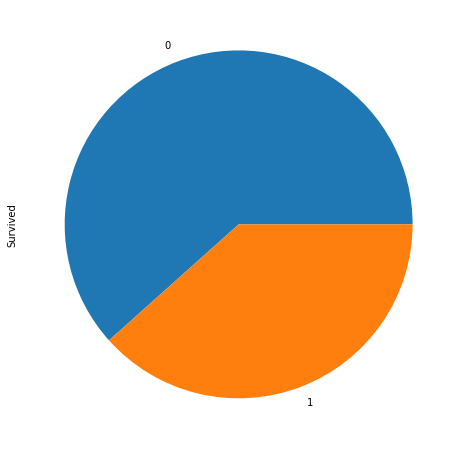

In [788]:
# 종속변수 확인해보기
print(train['Survived'].value_counts())
train['Survived'].value_counts().plot(kind = 'pie', figsize = (16,8))

In [789]:
# Age와 Cabin Embarked의 결측치가 확인 되었다.
print('train 결측치 확인',train.isnull().sum())
print('test 결측치 확인', test.isnull().sum())

train 결측치 확인 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
test 결측치 확인 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


# categorical feature

3    491
1    216
2    184
Name: Pclass, dtype: int64 male      577
female    314
Name: Sex, dtype: int64


Text(0.5, 1.0, 'Sex vs Survived')

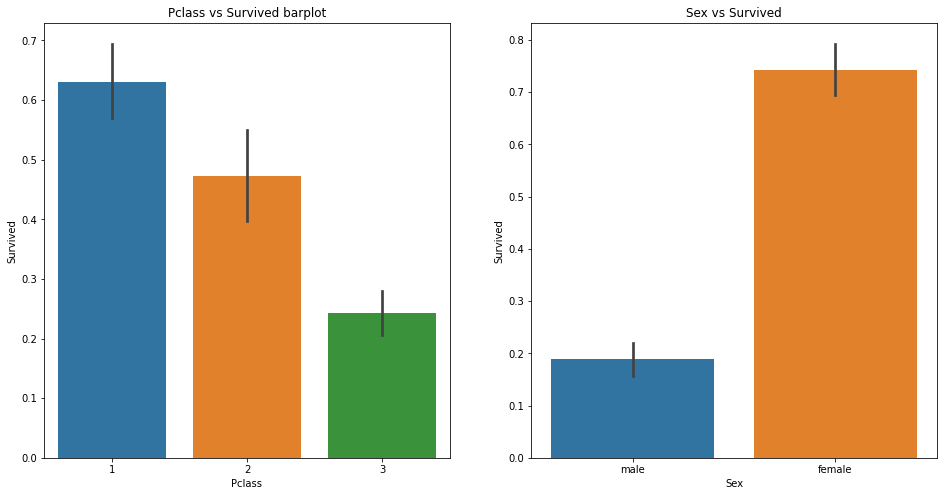

In [790]:
# column을 하나하나 살펴보기
# Pclass와 Sex는 라벨인코더 이후에 더미화를 해주도록 하자.
print(train['Pclass'].value_counts(), train['Sex'].value_counts())
fig, ax = plt.subplots(ncols = 2, figsize = (16,8))
sns.barplot(data = train, x = 'Pclass', y = 'Survived', ax = ax[0])
sns.barplot(data = train, x = 'Sex', y = 'Survived', ax = ax[1])
ax[0].set_title('Pclass vs Survived barplot')
ax[1].set_title('Sex vs Survived')

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64 0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


Text(0.5, 1.0, 'Parch vs Survived barplot')

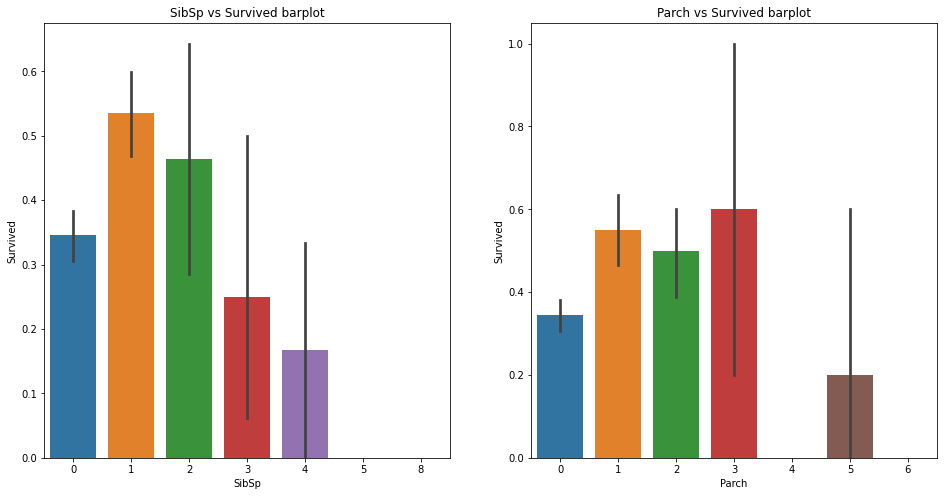

In [791]:
# SibSp, Parch
print(train['SibSp'].value_counts(), train['Parch'].value_counts())
fig, ax = plt.subplots(ncols = 2, figsize = (16,8))
sns.barplot(data = train, x = 'SibSp', y = 'Survived', ax = ax[0])
sns.barplot(data = train, x = 'Parch', y = 'Survived', ax = ax[1])
ax[0].set_title('SibSp vs Survived barplot')
ax[1].set_title('Parch vs Survived barplot')

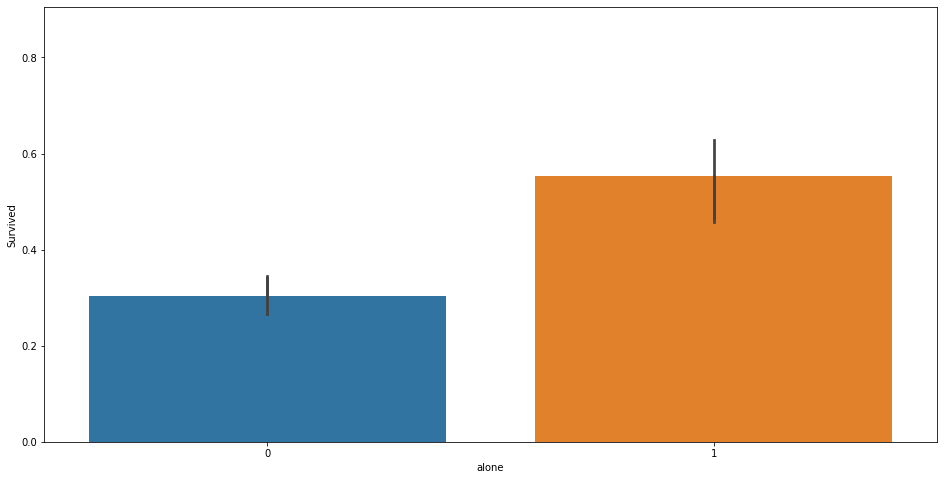

In [792]:
train_가족 = train['SibSp'] + train['Parch'] +1
test_가족 = test['SibSp'] + test['Parch'] + 1
train['가족'] = train_가족
test['가족'] = test_가족

plt.figure(figsize = (16,8))
sns.barplot(data = train, x = '가족', y = 'Survived')

train['alone'] = train['가족'].apply(lambda x:1 if x > 1 else 0)
test['alone'] = test['가족'].apply(lambda x:1 if x > 1 else 0)

# alone을 가지고 그래프 그려보기
sns.barplot(data = train, x = 'alone', y = 'Survived')

S    644
C    168
Q     77
Name: Embarked, dtype: int64


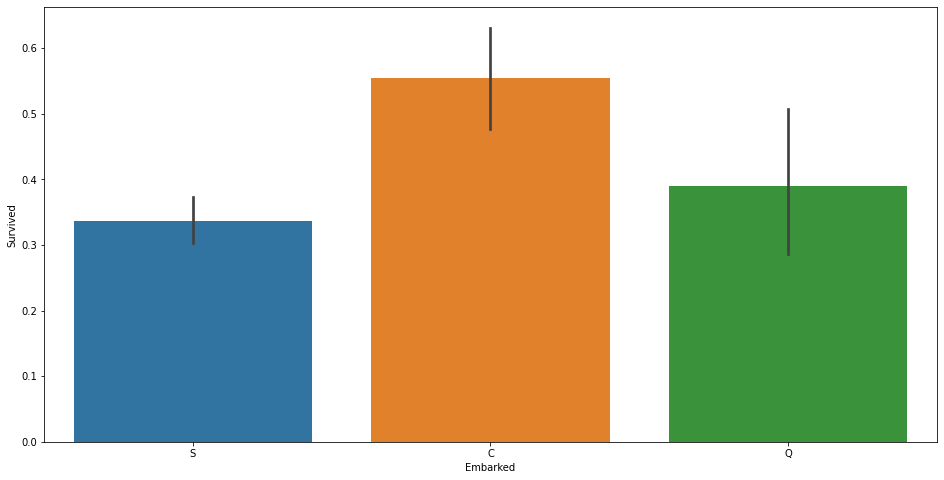

In [793]:
# Embarked
print(train['Embarked'].value_counts())
plt.figure(figsize = (16,8))
sns.barplot(data = train, x = 'Embarked', y = 'Survived')

# 결측치는 가장 많은 것으로 채우기로 하자.
train['Embarked'] = train['Embarked'].fillna('C')

# numerical feature

In [794]:
train['Age'] = train['Age'].fillna(-1)
test['Age'] = test['Age'].fillna(-1)

# train 결측치 채워주기
for i in train.index:
  if train.loc[i,'Age'] == -1:
    if train.loc[i,'Embarked'] == 'S':
      train.loc[i, 'Age'] = train[train['Embarked'] == 'S']['Age'].mean()
    elif train.loc[i,'Embarked'] == 'P':
      train.loc[i,'Age'] = train[train['Embarked'] == 'P']['Age'].mean()
    else:
      train.loc[i,'Age'] = train[train['Embarked'] == 'Q']['Age'].mean()


train['Age'] = pd.qcut(train['Age'], 4, labels = [0,1,2,3])
# test['Age'] = pd.qcut(test['Age'], 5, labels = [0,1,2,3,4])

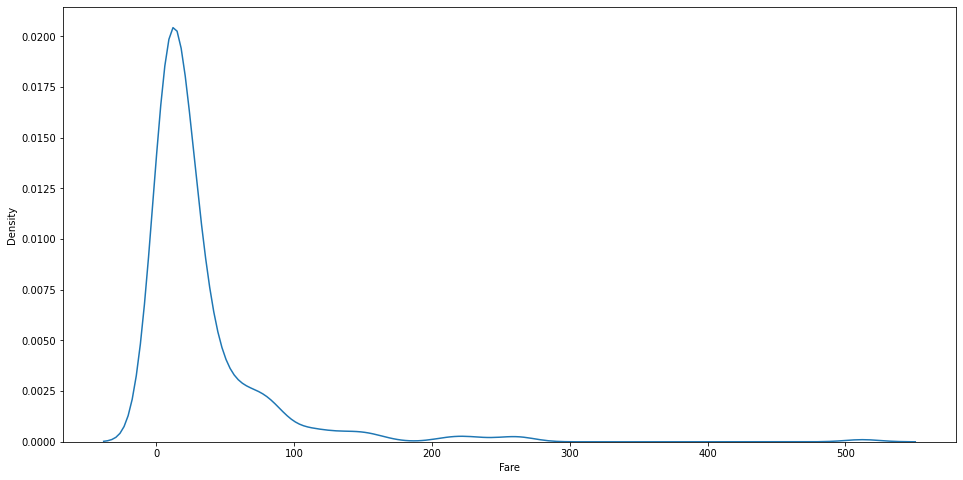

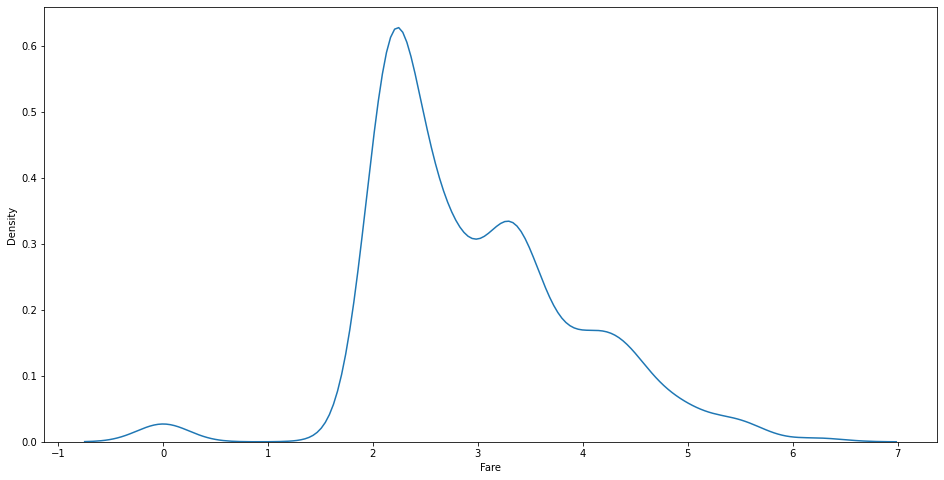

In [795]:
# Fare
plt.figure(figsize =(16,8))
sns.kdeplot(train['Fare'])

# 정규화를 위해서 log 씌우기
train['Fare'] = train['Fare'].apply(lambda x: np.log1p(x))
test['Fare'] = test['Fare'].apply(lambda x:np.log1p(x))

# 그래프 다시 그려보기
plt.figure(figsize = (16,8))
sns.kdeplot(train['Fare'])

In [796]:
# Fare변수도 사분위로 나눠주기
train['Fare'] = pd.qcut(train['Fare'], 4, labels = [0,1,2,3])
test['Fare'] = pd.qcut(test['Fare'], 4, labels = [0,1,2,3])

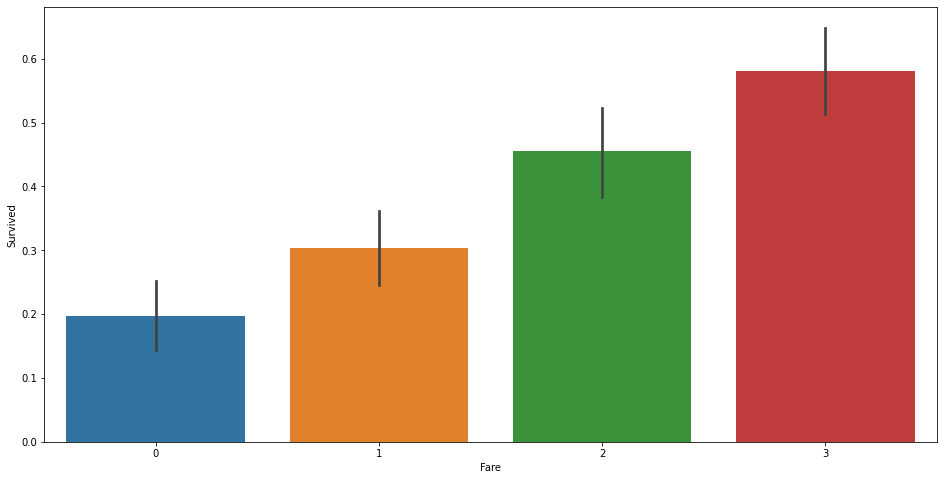

In [797]:
# 돈을 더 많이 낸 사람이 살아남았다?
plt.figure(figsize = (16,8))
sns.barplot(data = train, x = 'Fare', y = 'Survived')

# Modeling

In [798]:
# 모델링을 위한 전처리
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
categorical = ['Pclass','Sex','SibSp','Parch','Embarked']
drop = ['Name','Ticket','Cabin','PassengerId','SibSp','Parch']
# 라벨 인코딩
for i in categorical:  
  train[i] = le.fit_transform(train[i])
  test[i] = le.fit_transform(test[i])

# 필요없는 변수 없애주기
for i in drop:
  train = train.drop(i, axis = 1)
  test = test.drop(i, axis = 1)

In [799]:
# 더미화 시켜주기
train= pd.get_dummies(data = train, columns = ['Pclass','Sex','Embarked','Age','Fare','가족'])
test = pd.get_dummies(data = test, columns = ['Pclass','Sex','Embarked','Age','Fare','가족'])

In [800]:
train.columns

Index(['Survived', 'alone', 'Pclass_0', 'Pclass_1', 'Pclass_2', 'Sex_0',
       'Sex_1', 'Embarked_0', 'Embarked_1', 'Embarked_2', 'Age_0', 'Age_1',
       'Age_2', 'Age_3', 'Fare_0', 'Fare_1', 'Fare_2', 'Fare_3', '가족_1',
       '가족_2', '가족_3', '가족_4', '가족_5', '가족_6', '가족_7', '가족_8', '가족_11'],
      dtype='object')

In [801]:
!pip install catboost

In [802]:
!pip install vecstack

In [803]:
# modeling 해주기
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from catboost import CatBoostClassifier
from vecstack import stacking

X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived', axis = 1), train['Survived'], test_size = 0.2, random_state = 42)


xgb = XGBClassifier(random_state = 42)
lgb = LGBMClassifier(random_state = 42)
rfg = RandomForestClassifier(random_state = 42)
ada = AdaBoostClassifier(random_state = 42)
cat = CatBoostClassifier(random_state = 42)

models = {'xgb':xgb, 'lgb':lgb, 'rfg':rfg, 'ada':ada, 'cat':cat}
model_accuracy = {}

for i, j in models.items():
  model = j
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  accuracy = np.mean(y_pred == y_test)

  model_accuracy[f'{i}'] = accuracy

print(model_accuracy)

Learning rate set to 0.008911
0:	learn: 0.6874181	total: 1.2ms	remaining: 1.2s
1:	learn: 0.6815470	total: 2.95ms	remaining: 1.47s
2:	learn: 0.6762429	total: 4.5ms	remaining: 1.5s
3:	learn: 0.6709638	total: 5.68ms	remaining: 1.41s
4:	learn: 0.6656179	total: 7.18ms	remaining: 1.43s
5:	learn: 0.6606906	total: 8.35ms	remaining: 1.38s
6:	learn: 0.6557330	total: 9.51ms	remaining: 1.35s
7:	learn: 0.6517884	total: 11ms	remaining: 1.36s
8:	learn: 0.6466257	total: 12.6ms	remaining: 1.39s
9:	learn: 0.6415312	total: 14.2ms	remaining: 1.4s
10:	learn: 0.6368641	total: 15.7ms	remaining: 1.41s
11:	learn: 0.6321644	total: 17.2ms	remaining: 1.42s
12:	learn: 0.6274481	total: 18.8ms	remaining: 1.43s
13:	learn: 0.6231683	total: 20ms	remaining: 1.41s
14:	learn: 0.6192801	total: 21.5ms	remaining: 1.41s
15:	learn: 0.6156374	total: 23.1ms	remaining: 1.42s
16:	learn: 0.6131607	total: 23.9ms	remaining: 1.38s
17:	learn: 0.6087185	total: 25.3ms	remaining: 1.38s
18:	learn: 0.6055574	total: 26.8ms	remaining: 1.39s
1

In [804]:
models = [XGBClassifier(random_state = 42),LGBMClassifier(random_state = 42),RandomForestClassifier(random_state = 42),AdaBoostClassifier(random_state = 42),CatBoostClassifier(random_state = 42)]
S_train, S_test = stacking(models, X_train, y_train, X_test, regression = False, metric = ['acc'], n_folds = 3)

rfg = RandomForestClassifier()
rfg.fit(S_train, y_train)
y_pred = rfg.predict(S_test)

np.mean(y_pred == y_test)

Learning rate set to 0.00749
0:	learn: 0.6879556	total: 985us	remaining: 985ms
1:	learn: 0.6827714	total: 2.48ms	remaining: 1.24s
2:	learn: 0.6779190	total: 3.87ms	remaining: 1.28s
3:	learn: 0.6731519	total: 4.9ms	remaining: 1.22s
4:	learn: 0.6681400	total: 6.33ms	remaining: 1.26s
5:	learn: 0.6634100	total: 7.76ms	remaining: 1.28s
6:	learn: 0.6590852	total: 9.17ms	remaining: 1.3s
7:	learn: 0.6563218	total: 9.88ms	remaining: 1.22s
8:	learn: 0.6516324	total: 11.2ms	remaining: 1.24s
9:	learn: 0.6484611	total: 12.6ms	remaining: 1.25s
10:	learn: 0.6443095	total: 13.4ms	remaining: 1.21s
11:	learn: 0.6401388	total: 14.4ms	remaining: 1.18s
12:	learn: 0.6357418	total: 15.8ms	remaining: 1.2s
13:	learn: 0.6325162	total: 17.2ms	remaining: 1.21s
14:	learn: 0.6282606	total: 18.6ms	remaining: 1.22s
15:	learn: 0.6235688	total: 20ms	remaining: 1.23s
16:	learn: 0.6194923	total: 21.4ms	remaining: 1.24s
17:	learn: 0.6172866	total: 22.1ms	remaining: 1.2s
18:	learn: 0.6132907	total: 23.5ms	remaining: 1.21s


0.8324022346368715

In [807]:
from sklearn.ensemble import VotingClassifier

xgb = XGBClassifier(random_state = 42)
lgb = LGBMClassifier(random_state = 42)
rfg = RandomForestClassifier(random_state = 42)
ada = AdaBoostClassifier(random_state = 42)
cat = CatBoostClassifier(random_state = 42)

asd = VotingClassifier([('xgb',xgb),('lgb',lgb),('rfg',rfg),('ada',ada),('cat',cat)])
model = asd.fit(X_train, y_train)
y_pred = model.predict(X_test)

np.mean(y_pred == y_test)

Learning rate set to 0.008911
0:	learn: 0.6874181	total: 1.34ms	remaining: 1.34s
1:	learn: 0.6815470	total: 3.05ms	remaining: 1.52s
2:	learn: 0.6762429	total: 4.75ms	remaining: 1.58s
3:	learn: 0.6709638	total: 5.9ms	remaining: 1.47s
4:	learn: 0.6656179	total: 7.37ms	remaining: 1.47s
5:	learn: 0.6606906	total: 8.52ms	remaining: 1.41s
6:	learn: 0.6557330	total: 9.64ms	remaining: 1.37s
7:	learn: 0.6517884	total: 11.1ms	remaining: 1.38s
8:	learn: 0.6466257	total: 12.6ms	remaining: 1.39s
9:	learn: 0.6415312	total: 14.1ms	remaining: 1.4s
10:	learn: 0.6368641	total: 15.5ms	remaining: 1.4s
11:	learn: 0.6321644	total: 17ms	remaining: 1.4s
12:	learn: 0.6274481	total: 18.6ms	remaining: 1.41s
13:	learn: 0.6231683	total: 19.7ms	remaining: 1.39s
14:	learn: 0.6192801	total: 21.2ms	remaining: 1.39s
15:	learn: 0.6156374	total: 22.6ms	remaining: 1.39s
16:	learn: 0.6131607	total: 23.4ms	remaining: 1.35s
17:	learn: 0.6087185	total: 24.8ms	remaining: 1.35s
18:	learn: 0.6055574	total: 26.3ms	remaining: 1.36

0.8379888268156425